### Logistic problem
### $$ \min_x \frac{1}{M} \sum_{i=1}^{M}\log[1+\exp{(-b_ia_i^\top x)}]+\frac{\mu}{2}\vert\vert x\vert\vert^2 $$
### where $a_1, a_2, \cdots, a_m\in R^n$, $b_1, b_2, \cdots, b_m\in R$ and $\gamma>0$. We notice that the Lipschitz constant $L=$  

In [1]:
# First we import some useful packages. Don't import any other package.
import numpy as np
import matplotlib.pyplot as plt
import time as clock

In [2]:
from libsvm.svmutil import *

In [3]:
name = "svmguide1"

In [4]:
from sklearn.datasets import load_svmlight_file
import numpy as np

x_sparse, y = load_svmlight_file(name+".txt")
x = x_sparse.toarray()  # Convert to dense numpy array

print("Features:", x)
print("Labels:", y)


Features: [[ 2.617300e+01  5.886700e+01 -1.894697e-01  1.251225e+02]
 [ 5.707397e+01  2.214040e+02  8.607959e-02  1.229114e+02]
 [ 1.725900e+01  1.734360e+02 -1.298053e-01  1.250318e+02]
 ...
 [ 2.391101e+01  3.890001e+01  4.704049e-01  1.257871e+02]
 [ 2.230670e+01  2.262220e+01  2.117224e-01  1.012818e+02]
 [ 1.640820e+01  3.920219e+01 -9.912787e-02  3.248707e+01]]
Labels: [1. 1. 1. ... 0. 0. 0.]


In [5]:
np.max(x)

581.0731

In [6]:
A=x

In [7]:
b = y
b = b.reshape((len(b),1))

In [8]:
len(A)

3089

### Initialization of the model

In [10]:
mu = 0.01

In [11]:
np.random.seed(1)
x0 = 1*np.random.randn(len(A[0]),1)

In [12]:
M = len(A)
#L = 2*np.trace(A@A.T)/M+ mu
L = 2*np.trace(A.T@A)/M+ mu
#L = 2*np.max(np.diag(A@A.T)) + mu
stepsize = 1/(L)#1/2L
H = 2
Model = {'A':A, 'b':b, 'mu':mu,'x':x0,'Lip':L,'H':2};
options= {'stepsize':stepsize}

### Algorithm

In [16]:
#Load 
from Mathtools import *
from gradNewton import *
from HBF import *
from CubicNewton import *
from CubicBFGS import *
from VarStep_BFGS import *
from gd import *

In [17]:
Model['Lip'] = L

In [18]:
#test
maxiter = 10000#300;#500
check = 10
tol = 1e-8;

# taping:
xs = [];
rs = [];
fs = [];
ts = [];
cols = [];
legs = [];

nams = [];

# colors for the image
COLSR1 = [(1,0,0,1), (1,0.5,0,1), (1,0,0.5,1), (0,0.5,0.5,1), (0.5,0.5,0,1) ]
COLBFGS =  [(0.3,0.7,0,1), (0.7,0.2,0.3,1), (0,0,0,1), (0.5,0,0.2,1), (0.2,0.2,0.7,1) ]

In [19]:
# turn algorithms to be run on or off
run_Cubic_Newton = 1;
run_VarStep_BFGS = 1;
run_Cubic_BFGS = 1;
run_grad_Newton = 1; #grad SR1 ad
run_HBF = 1
run_gd = 1
#with open(name+'starting_point.npy', 'rb') as f:#U
#      x1= np.load(f)
np.random.seed(1)
x0 = 0.0*np.random.randn(len(A[0,:]),1)#x1
Model['x'] =x0
compute_starting_point = False;


#TOl
tol = 1e-8
if compute_starting_point: # optimal solution is compyted using FISTA
    maxiter =500;
    check = 1;
    Model['x'] =0*np.random.randn(len(A[0,:]),1)
    run_VarStep_BFGS = 0; #grad SR1 ad
    run_gd = 0
    run_Cubic_Newton = 0;
    run_grad_Newton = 0;
    run_Cubic_BFGS = 0;

    run_VarStep_BFGS = 0; #grad SR1 ad
    run_HBF = 0
    run_gd = 1
    
    
    

In [20]:
#####################################################################
if run_Cubic_Newton:
    
    print('');
    print('********************************************************');
    print('***Cubic Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])
    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0.6,1));
    legs.append('Cubic Newton');
    nams.append('Cubic Newton');


********************************************************
***Cubic Newton **
***********
iter:10, funValue:0.248547,fun:0.248547
iter:20, funValue:0.246177,fun:0.246177
iter:30, funValue:0.245576,fun:0.245576
iter:40, funValue:0.245294,fun:0.245294
iter:50, funValue:0.245129,fun:0.245129
iter:60, funValue:0.245019,fun:0.245019
iter:70, funValue:0.244941,fun:0.244941
iter:80, funValue:0.244883,fun:0.244883
iter:90, funValue:0.244837,fun:0.244837
iter:100, funValue:0.244801,fun:0.244801
iter:110, funValue:0.244771,fun:0.244771
iter:120, funValue:0.244746,fun:0.244746
iter:130, funValue:0.244725,fun:0.244725
iter:140, funValue:0.244707,fun:0.244707
iter:150, funValue:0.244692,fun:0.244692
iter:160, funValue:0.244678,fun:0.244678
iter:170, funValue:0.244666,fun:0.244666
iter:180, funValue:0.244655,fun:0.244655
iter:190, funValue:0.244646,fun:0.244646
iter:200, funValue:0.244637,fun:0.244637
iter:210, funValue:0.244629,fun:0.244629
iter:220, funValue:0.244622,fun:0.244622
iter:230, funValue

iter:1970, funValue:0.244464,fun:0.244464
iter:1980, funValue:0.244464,fun:0.244464
iter:1990, funValue:0.244464,fun:0.244464
iter:2000, funValue:0.244464,fun:0.244464
iter:2010, funValue:0.244463,fun:0.244463
iter:2020, funValue:0.244463,fun:0.244463
iter:2030, funValue:0.244463,fun:0.244463
iter:2040, funValue:0.244463,fun:0.244463
iter:2050, funValue:0.244462,fun:0.244462
iter:2060, funValue:0.244462,fun:0.244462
iter:2070, funValue:0.244462,fun:0.244462
iter:2080, funValue:0.244462,fun:0.244462
iter:2090, funValue:0.244462,fun:0.244462
iter:2100, funValue:0.244461,fun:0.244461
iter:2110, funValue:0.244461,fun:0.244461
iter:2120, funValue:0.244461,fun:0.244461
iter:2130, funValue:0.244461,fun:0.244461
iter:2140, funValue:0.244461,fun:0.244461
iter:2150, funValue:0.244460,fun:0.244460
iter:2160, funValue:0.244460,fun:0.244460
iter:2170, funValue:0.244460,fun:0.244460
iter:2180, funValue:0.244460,fun:0.244460
iter:2190, funValue:0.244460,fun:0.244460
iter:2200, funValue:0.244459,fun:0

iter:4020, funValue:0.244438,fun:0.244438
iter:4030, funValue:0.244437,fun:0.244437
iter:4040, funValue:0.244437,fun:0.244437
iter:4050, funValue:0.244437,fun:0.244437
iter:4060, funValue:0.244437,fun:0.244437
iter:4070, funValue:0.244437,fun:0.244437
iter:4080, funValue:0.244437,fun:0.244437
iter:4090, funValue:0.244437,fun:0.244437
iter:4100, funValue:0.244437,fun:0.244437
iter:4110, funValue:0.244437,fun:0.244437
iter:4120, funValue:0.244437,fun:0.244437
iter:4130, funValue:0.244437,fun:0.244437
iter:4140, funValue:0.244437,fun:0.244437
iter:4150, funValue:0.244437,fun:0.244437
iter:4160, funValue:0.244437,fun:0.244437
iter:4170, funValue:0.244436,fun:0.244436
iter:4180, funValue:0.244436,fun:0.244436
iter:4190, funValue:0.244436,fun:0.244436
iter:4200, funValue:0.244436,fun:0.244436
iter:4210, funValue:0.244436,fun:0.244436
iter:4220, funValue:0.244436,fun:0.244436
iter:4230, funValue:0.244436,fun:0.244436
iter:4240, funValue:0.244436,fun:0.244436
iter:4250, funValue:0.244436,fun:0

iter:6170, funValue:0.244427,fun:0.244427
iter:6180, funValue:0.244427,fun:0.244427
iter:6190, funValue:0.244427,fun:0.244427
iter:6200, funValue:0.244427,fun:0.244427
iter:6210, funValue:0.244427,fun:0.244427
iter:6220, funValue:0.244427,fun:0.244427
iter:6230, funValue:0.244427,fun:0.244427
iter:6240, funValue:0.244427,fun:0.244427
iter:6250, funValue:0.244427,fun:0.244427
iter:6260, funValue:0.244427,fun:0.244427
iter:6270, funValue:0.244427,fun:0.244427
iter:6280, funValue:0.244427,fun:0.244427
iter:6290, funValue:0.244427,fun:0.244427
iter:6300, funValue:0.244426,fun:0.244426
iter:6310, funValue:0.244426,fun:0.244426
iter:6320, funValue:0.244426,fun:0.244426
iter:6330, funValue:0.244426,fun:0.244426
iter:6340, funValue:0.244426,fun:0.244426
iter:6350, funValue:0.244426,fun:0.244426
iter:6360, funValue:0.244426,fun:0.244426
iter:6370, funValue:0.244426,fun:0.244426
iter:6380, funValue:0.244426,fun:0.244426
iter:6390, funValue:0.244426,fun:0.244426
iter:6400, funValue:0.244426,fun:0

iter:8320, funValue:0.244422,fun:0.244422
iter:8330, funValue:0.244422,fun:0.244422
iter:8340, funValue:0.244422,fun:0.244422
iter:8350, funValue:0.244422,fun:0.244422
iter:8360, funValue:0.244422,fun:0.244422
iter:8370, funValue:0.244422,fun:0.244422
iter:8380, funValue:0.244422,fun:0.244422
iter:8390, funValue:0.244422,fun:0.244422
iter:8400, funValue:0.244422,fun:0.244422
iter:8410, funValue:0.244422,fun:0.244422
iter:8420, funValue:0.244422,fun:0.244422
iter:8430, funValue:0.244422,fun:0.244422
iter:8440, funValue:0.244422,fun:0.244422
iter:8450, funValue:0.244422,fun:0.244422
iter:8460, funValue:0.244422,fun:0.244422
iter:8470, funValue:0.244422,fun:0.244422
iter:8480, funValue:0.244422,fun:0.244422
iter:8490, funValue:0.244422,fun:0.244422
iter:8500, funValue:0.244421,fun:0.244421
iter:8510, funValue:0.244421,fun:0.244421
iter:8520, funValue:0.244421,fun:0.244421
iter:8530, funValue:0.244421,fun:0.244421
iter:8540, funValue:0.244421,fun:0.244421
iter:8550, funValue:0.244421,fun:0

In [21]:
#####################################################################
if run_grad_Newton:
    
    print('');
    print('********************************************************');
    print('***Grad Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = grad_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0,1));
    legs.append('Grad Newton');
    nams.append('Grad Newton');


********************************************************
***Grad Newton **
***********
iter:10, funValue:0.248572,fun:0.248572
iter:20, funValue:0.246183,fun:0.246183
iter:30, funValue:0.245579,fun:0.245579
iter:40, funValue:0.245296,fun:0.245296
iter:50, funValue:0.245130,fun:0.245130
iter:60, funValue:0.245020,fun:0.245020
iter:70, funValue:0.244941,fun:0.244941
iter:80, funValue:0.244882,fun:0.244882
iter:90, funValue:0.244837,fun:0.244837
iter:100, funValue:0.244800,fun:0.244800
iter:110, funValue:0.244770,fun:0.244770
iter:120, funValue:0.244745,fun:0.244745
iter:130, funValue:0.244724,fun:0.244724
iter:140, funValue:0.244706,fun:0.244706
iter:150, funValue:0.244690,fun:0.244690
iter:160, funValue:0.244677,fun:0.244677
iter:170, funValue:0.244664,fun:0.244664
iter:180, funValue:0.244654,fun:0.244654
iter:190, funValue:0.244644,fun:0.244644
iter:200, funValue:0.244635,fun:0.244635
iter:210, funValue:0.244627,fun:0.244627
iter:220, funValue:0.244620,fun:0.244620
iter:230, funValue:

iter:2080, funValue:0.244461,fun:0.244461
iter:2090, funValue:0.244461,fun:0.244461
iter:2100, funValue:0.244461,fun:0.244461
iter:2110, funValue:0.244461,fun:0.244461
iter:2120, funValue:0.244460,fun:0.244460
iter:2130, funValue:0.244460,fun:0.244460
iter:2140, funValue:0.244460,fun:0.244460
iter:2150, funValue:0.244460,fun:0.244460
iter:2160, funValue:0.244460,fun:0.244460
iter:2170, funValue:0.244460,fun:0.244460
iter:2180, funValue:0.244459,fun:0.244459
iter:2190, funValue:0.244459,fun:0.244459
iter:2200, funValue:0.244459,fun:0.244459
iter:2210, funValue:0.244459,fun:0.244459
iter:2220, funValue:0.244459,fun:0.244459
iter:2230, funValue:0.244458,fun:0.244458
iter:2240, funValue:0.244458,fun:0.244458
iter:2250, funValue:0.244458,fun:0.244458
iter:2260, funValue:0.244458,fun:0.244458
iter:2270, funValue:0.244458,fun:0.244458
iter:2280, funValue:0.244457,fun:0.244457
iter:2290, funValue:0.244457,fun:0.244457
iter:2300, funValue:0.244457,fun:0.244457
iter:2310, funValue:0.244457,fun:0

iter:4230, funValue:0.244436,fun:0.244436
iter:4240, funValue:0.244436,fun:0.244436
iter:4250, funValue:0.244436,fun:0.244436
iter:4260, funValue:0.244436,fun:0.244436
iter:4270, funValue:0.244436,fun:0.244436
iter:4280, funValue:0.244436,fun:0.244436
iter:4290, funValue:0.244436,fun:0.244436
iter:4300, funValue:0.244435,fun:0.244435
iter:4310, funValue:0.244435,fun:0.244435
iter:4320, funValue:0.244435,fun:0.244435
iter:4330, funValue:0.244435,fun:0.244435
iter:4340, funValue:0.244435,fun:0.244435
iter:4350, funValue:0.244435,fun:0.244435
iter:4360, funValue:0.244435,fun:0.244435
iter:4370, funValue:0.244435,fun:0.244435
iter:4380, funValue:0.244435,fun:0.244435
iter:4390, funValue:0.244435,fun:0.244435
iter:4400, funValue:0.244435,fun:0.244435
iter:4410, funValue:0.244435,fun:0.244435
iter:4420, funValue:0.244435,fun:0.244435
iter:4430, funValue:0.244435,fun:0.244435
iter:4440, funValue:0.244435,fun:0.244435
iter:4450, funValue:0.244434,fun:0.244434
iter:4460, funValue:0.244434,fun:0

iter:6530, funValue:0.244426,fun:0.244426
iter:6540, funValue:0.244426,fun:0.244426
iter:6550, funValue:0.244426,fun:0.244426
iter:6560, funValue:0.244426,fun:0.244426
iter:6570, funValue:0.244426,fun:0.244426
iter:6580, funValue:0.244426,fun:0.244426
iter:6590, funValue:0.244426,fun:0.244426
iter:6600, funValue:0.244426,fun:0.244426
iter:6610, funValue:0.244425,fun:0.244425
iter:6620, funValue:0.244425,fun:0.244425
iter:6630, funValue:0.244425,fun:0.244425
iter:6640, funValue:0.244425,fun:0.244425
iter:6650, funValue:0.244425,fun:0.244425
iter:6660, funValue:0.244425,fun:0.244425
iter:6670, funValue:0.244425,fun:0.244425
iter:6680, funValue:0.244425,fun:0.244425
iter:6690, funValue:0.244425,fun:0.244425
iter:6700, funValue:0.244425,fun:0.244425
iter:6710, funValue:0.244425,fun:0.244425
iter:6720, funValue:0.244425,fun:0.244425
iter:6730, funValue:0.244425,fun:0.244425
iter:6740, funValue:0.244425,fun:0.244425
iter:6750, funValue:0.244425,fun:0.244425
iter:6760, funValue:0.244425,fun:0

iter:8500, funValue:0.244421,fun:0.244421
iter:8510, funValue:0.244421,fun:0.244421
iter:8520, funValue:0.244421,fun:0.244421
iter:8530, funValue:0.244421,fun:0.244421
iter:8540, funValue:0.244421,fun:0.244421
iter:8550, funValue:0.244421,fun:0.244421
iter:8560, funValue:0.244421,fun:0.244421
iter:8570, funValue:0.244421,fun:0.244421
iter:8580, funValue:0.244421,fun:0.244421
iter:8590, funValue:0.244421,fun:0.244421
iter:8600, funValue:0.244421,fun:0.244421
iter:8610, funValue:0.244421,fun:0.244421
iter:8620, funValue:0.244421,fun:0.244421
iter:8630, funValue:0.244421,fun:0.244421
iter:8640, funValue:0.244421,fun:0.244421
iter:8650, funValue:0.244421,fun:0.244421
iter:8660, funValue:0.244421,fun:0.244421
iter:8670, funValue:0.244421,fun:0.244421
iter:8680, funValue:0.244421,fun:0.244421
iter:8690, funValue:0.244421,fun:0.244421
iter:8700, funValue:0.244421,fun:0.244421
iter:8710, funValue:0.244421,fun:0.244421
iter:8720, funValue:0.244421,fun:0.244421
iter:8730, funValue:0.244421,fun:0

In [22]:
#####################################################################
if run_Cubic_BFGS:
    
    print('');
    print('********************************************************');
    print('***Cubic BFGS **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_BFGS(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.8,0.5,0.4,1));
    legs.append('Cubic BFGS');
    nams.append('Cubic BFGS');


********************************************************
***Cubic BFGS **
***********
*****number of iterations***
1
iter:10, funValue:0.245193,fun:0.245193
iter:20, funValue:0.244415,fun:0.244415
iter:30, funValue:0.244415,fun:0.244415
iter:40, funValue:0.244414,fun:0.244414
iter:50, funValue:0.244414,fun:0.244414
iter:60, funValue:0.244414,fun:0.244414
iter:70, funValue:0.244414,fun:0.244414
iter:80, funValue:0.244414,fun:0.244414
iter:90, funValue:0.244414,fun:0.244414
iter:100, funValue:0.244414,fun:0.244414
iter:110, funValue:0.244414,fun:0.244414
iter:120, funValue:0.244414,fun:0.244414
iter:130, funValue:0.244414,fun:0.244414
Tolerance value reached
num_restart= 1


In [23]:

#####################################################################
if run_VarStep_BFGS:
    
    print('');
    print('********************************************************');
    print('***VarStep_BFGS ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        
    }

   
    
    output = VarStep_BFGS(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.7,0.1,0,1));
    legs.append('VarStep BFGS');
    nams.append('VarStep BFGS');


********************************************************
***VarStep_BFGS ***
***********
*****number of iterations***
1
*****number of iterations***
4
*****number of iterations***
7
iter:10, funValue:0.260769,fun:0.260769
*****number of iterations***
11
*****number of iterations***
15
*****number of iterations***
18
iter:20, funValue:0.245313,fun:0.245313
*****number of iterations***
21
*****number of iterations***
24
*****number of iterations***
28
iter:30, funValue:0.244458,fun:0.244458
iter:40, funValue:0.244414,fun:0.244414
iter:50, funValue:0.244414,fun:0.244414
iter:60, funValue:0.244414,fun:0.244414
iter:70, funValue:0.244414,fun:0.244414
iter:80, funValue:0.244414,fun:0.244414
iter:90, funValue:0.244414,fun:0.244414
iter:100, funValue:0.244414,fun:0.244414
iter:110, funValue:0.244414,fun:0.244414
iter:120, funValue:0.244414,fun:0.244414
iter:130, funValue:0.244414,fun:0.244414
iter:140, funValue:0.244414,fun:0.244414
iter:150, funValue:0.244414,fun:0.244414
Tolerence value rea

In [24]:
if run_HBF:
    
    print('');
    print('********************************************************');
    print('***Accelerated ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False,
    }

    if compute_starting_point== True:
        maxiter = 20
    
    output = HBF(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    
    fs.append(output['seq_obj']);
    
    cols.append((0.4,0.5,0,1));
    legs.append('HBF');
    nams.append('HBF');
    
        
    


********************************************************
***Accelerated ***
***********
iter:10, time:1747335937.383184, tau:0.000051,fun:0.244495
iter:20, time:1747335937.387702, tau:0.000051,fun:0.244451
iter:30, time:1747335937.392724, tau:0.000051,fun:0.244565
iter:40, time:1747335937.397224, tau:0.000051,fun:0.244724
iter:50, time:1747335937.401388, tau:0.000051,fun:0.244928
iter:60, time:1747335937.405316, tau:0.000051,fun:0.245175
iter:70, time:1747335937.408638, tau:0.000051,fun:0.245465
iter:80, time:1747335937.412502, tau:0.000051,fun:0.245796
iter:90, time:1747335937.415709, tau:0.000051,fun:0.246167
iter:100, time:1747335937.418188, tau:0.000051,fun:0.246578
iter:110, time:1747335937.421229, tau:0.000051,fun:0.247027
iter:120, time:1747335937.424392, tau:0.000051,fun:0.247513
iter:130, time:1747335937.426585, tau:0.000051,fun:0.248036
iter:140, time:1747335937.429504, tau:0.000051,fun:0.248595
iter:150, time:1747335937.432199, tau:0.000051,fun:0.249188
iter:160, time:17473

/Users/shidawang/Documents/BFGS/Experiment2Logistic/Mathtools.py:29: RuntimeWarning: overflow encountered in true_divide
  grad = A.T@( (-1)*b*(1/(1+(1/ex))))/M
/Users/shidawang/Documents/BFGS/Experiment2Logistic/Mathtools.py:29: RuntimeWarning: divide by zero encountered in true_divide
  grad = A.T@( (-1)*b*(1/(1+(1/ex))))/M


iter:1080, time:1747335937.578229, tau:0.000051,fun:0.356001
iter:1090, time:1747335937.579904, tau:0.000051,fun:0.356943
iter:1100, time:1747335937.581410, tau:0.000051,fun:0.357871
iter:1110, time:1747335937.582897, tau:0.000051,fun:0.358784
iter:1120, time:1747335937.586723, tau:0.000051,fun:0.359682
iter:1130, time:1747335937.588489, tau:0.000051,fun:0.360566
iter:1140, time:1747335937.590487, tau:0.000051,fun:0.361434
iter:1150, time:1747335937.601496, tau:0.000051,fun:0.362288
iter:1160, time:1747335937.605192, tau:0.000051,fun:0.363126
iter:1170, time:1747335937.607241, tau:0.000051,fun:0.363949
iter:1180, time:1747335937.610371, tau:0.000051,fun:0.364757
iter:1190, time:1747335937.611837, tau:0.000051,fun:0.365550
iter:1200, time:1747335937.614206, tau:0.000051,fun:0.366326
iter:1210, time:1747335937.616072, tau:0.000051,fun:0.367087
iter:1220, time:1747335937.617924, tau:0.000051,fun:0.367833
iter:1230, time:1747335937.619635, tau:0.000051,fun:0.368563
iter:1240, time:17473359

iter:3540, time:1747335937.981363, tau:0.000051,fun:0.276913
iter:3550, time:1747335937.983215, tau:0.000051,fun:0.276389
iter:3560, time:1747335937.984590, tau:0.000051,fun:0.275870
iter:3570, time:1747335937.985941, tau:0.000051,fun:0.275356
iter:3580, time:1747335937.987380, tau:0.000051,fun:0.274846
iter:3590, time:1747335937.989106, tau:0.000051,fun:0.274342
iter:3600, time:1747335937.990954, tau:0.000051,fun:0.273842
iter:3610, time:1747335937.994539, tau:0.000051,fun:0.273346
iter:3620, time:1747335937.996037, tau:0.000051,fun:0.272856
iter:3630, time:1747335937.998029, tau:0.000051,fun:0.272370
iter:3640, time:1747335937.999497, tau:0.000051,fun:0.271889
iter:3650, time:1747335938.000830, tau:0.000051,fun:0.271412
iter:3660, time:1747335938.003383, tau:0.000051,fun:0.270941
iter:3670, time:1747335938.005017, tau:0.000051,fun:0.270474
iter:3680, time:1747335938.006429, tau:0.000051,fun:0.270012
iter:3690, time:1747335938.007965, tau:0.000051,fun:0.269555
iter:3700, time:17473359

iter:5850, time:1747335938.385004, tau:0.000051,fun:0.246685
iter:5860, time:1747335938.387559, tau:0.000051,fun:0.246721
iter:5870, time:1747335938.388985, tau:0.000051,fun:0.246756
iter:5880, time:1747335938.390475, tau:0.000051,fun:0.246791
iter:5890, time:1747335938.391954, tau:0.000051,fun:0.246826
iter:5900, time:1747335938.393441, tau:0.000051,fun:0.246861
iter:5910, time:1747335938.394888, tau:0.000051,fun:0.246895
iter:5920, time:1747335938.396306, tau:0.000051,fun:0.246929
iter:5930, time:1747335938.398431, tau:0.000051,fun:0.246963
iter:5940, time:1747335938.399964, tau:0.000051,fun:0.246996
iter:5950, time:1747335938.402306, tau:0.000051,fun:0.247029
iter:5960, time:1747335938.403882, tau:0.000051,fun:0.247062
iter:5970, time:1747335938.405333, tau:0.000051,fun:0.247095
iter:5980, time:1747335938.406787, tau:0.000051,fun:0.247127
iter:5990, time:1747335938.408175, tau:0.000051,fun:0.247159
iter:6000, time:1747335938.409495, tau:0.000051,fun:0.247190
iter:6010, time:17473359

iter:7210, time:1747335938.586384, tau:0.000051,fun:0.247938
iter:7220, time:1747335938.587870, tau:0.000051,fun:0.247922
iter:7230, time:1747335938.589252, tau:0.000051,fun:0.247906
iter:7240, time:1747335938.590597, tau:0.000051,fun:0.247890
iter:7250, time:1747335938.591960, tau:0.000051,fun:0.247874
iter:7260, time:1747335938.593337, tau:0.000051,fun:0.247857
iter:7270, time:1747335938.594677, tau:0.000051,fun:0.247841
iter:7280, time:1747335938.596061, tau:0.000051,fun:0.247824
iter:7290, time:1747335938.597406, tau:0.000051,fun:0.247807
iter:7300, time:1747335938.598781, tau:0.000051,fun:0.247789
iter:7310, time:1747335938.600159, tau:0.000051,fun:0.247772
iter:7320, time:1747335938.601505, tau:0.000051,fun:0.247754
iter:7330, time:1747335938.602839, tau:0.000051,fun:0.247736
iter:7340, time:1747335938.604231, tau:0.000051,fun:0.247718
iter:7350, time:1747335938.605598, tau:0.000051,fun:0.247700
iter:7360, time:1747335938.606986, tau:0.000051,fun:0.247682
iter:7370, time:17473359

iter:8650, time:1747335938.787209, tau:0.000051,fun:0.245183
iter:8660, time:1747335938.789920, tau:0.000051,fun:0.245170
iter:8670, time:1747335938.791326, tau:0.000051,fun:0.245156
iter:8680, time:1747335938.792714, tau:0.000051,fun:0.245142
iter:8690, time:1747335938.794072, tau:0.000051,fun:0.245129
iter:8700, time:1747335938.795464, tau:0.000051,fun:0.245115
iter:8710, time:1747335938.796826, tau:0.000051,fun:0.245102
iter:8720, time:1747335938.798148, tau:0.000051,fun:0.245089
iter:8730, time:1747335938.799512, tau:0.000051,fun:0.245076
iter:8740, time:1747335938.800883, tau:0.000051,fun:0.245063
iter:8750, time:1747335938.802231, tau:0.000051,fun:0.245050
iter:8760, time:1747335938.803626, tau:0.000051,fun:0.245038
iter:8770, time:1747335938.804968, tau:0.000051,fun:0.245025
iter:8780, time:1747335938.806312, tau:0.000051,fun:0.245013
iter:8790, time:1747335938.807698, tau:0.000051,fun:0.245001
iter:8800, time:1747335938.809002, tau:0.000051,fun:0.244989
iter:8810, time:17473359

In [25]:
if run_gd:
    
    print('');
    print('********************************************************');
    print('***Gradient  ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False
    }
#     if compute_starting_point== True:
#         maxiter = 1000
   
    
    output = gd(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_obj']);
    cols.append((0.4,0.2,0,1));
    legs.append('GD');
    nams.append('GD');
    if compute_starting_point== True:
        np.save(name+'starting_point.npy',output['sol'])


********************************************************
***Gradient  ***
***********
iter:10, time:1747335939.905734, tau:0.000013,fun:0.421748
iter:20, time:1747335939.910464, tau:0.000013,fun:0.355183
iter:30, time:1747335939.915886, tau:0.000013,fun:0.325639
iter:40, time:1747335939.919413, tau:0.000013,fun:0.308876
iter:50, time:1747335939.922258, tau:0.000013,fun:0.298034
iter:60, time:1747335939.925903, tau:0.000013,fun:0.290426
iter:70, time:1747335939.928751, tau:0.000013,fun:0.284782
iter:80, time:1747335939.930907, tau:0.000013,fun:0.280421
iter:90, time:1747335939.933439, tau:0.000013,fun:0.276947
iter:100, time:1747335939.936600, tau:0.000013,fun:0.274110
iter:110, time:1747335939.939461, tau:0.000013,fun:0.271749
iter:120, time:1747335939.942302, tau:0.000013,fun:0.269751
iter:130, time:1747335939.944821, tau:0.000013,fun:0.268039
iter:140, time:1747335939.946943, tau:0.000013,fun:0.266553
iter:150, time:1747335939.949055, tau:0.000013,fun:0.265251
iter:160, time:1747335

iter:2560, time:1747335940.302644, tau:0.000013,fun:0.246068
iter:2570, time:1747335940.305657, tau:0.000013,fun:0.246062
iter:2580, time:1747335940.308381, tau:0.000013,fun:0.246056
iter:2590, time:1747335940.309940, tau:0.000013,fun:0.246051
iter:2600, time:1747335940.311353, tau:0.000013,fun:0.246045
iter:2610, time:1747335940.312683, tau:0.000013,fun:0.246039
iter:2620, time:1747335940.314817, tau:0.000013,fun:0.246034
iter:2630, time:1747335940.316098, tau:0.000013,fun:0.246028
iter:2640, time:1747335940.317422, tau:0.000013,fun:0.246023
iter:2650, time:1747335940.318680, tau:0.000013,fun:0.246017
iter:2660, time:1747335940.319984, tau:0.000013,fun:0.246012
iter:2670, time:1747335940.321370, tau:0.000013,fun:0.246006
iter:2680, time:1747335940.323888, tau:0.000013,fun:0.246001
iter:2690, time:1747335940.325302, tau:0.000013,fun:0.245996
iter:2700, time:1747335940.327524, tau:0.000013,fun:0.245990
iter:2710, time:1747335940.329079, tau:0.000013,fun:0.245985
iter:2720, time:17473359

iter:5050, time:1747335940.705477, tau:0.000013,fun:0.245309
iter:5060, time:1747335940.707152, tau:0.000013,fun:0.245307
iter:5070, time:1747335940.708593, tau:0.000013,fun:0.245306
iter:5080, time:1747335940.710359, tau:0.000013,fun:0.245304
iter:5090, time:1747335940.711762, tau:0.000013,fun:0.245303
iter:5100, time:1747335940.713177, tau:0.000013,fun:0.245301
iter:5110, time:1747335940.714931, tau:0.000013,fun:0.245300
iter:5120, time:1747335940.717422, tau:0.000013,fun:0.245298
iter:5130, time:1747335940.720764, tau:0.000013,fun:0.245296
iter:5140, time:1747335940.724017, tau:0.000013,fun:0.245295
iter:5150, time:1747335940.725730, tau:0.000013,fun:0.245293
iter:5160, time:1747335940.728020, tau:0.000013,fun:0.245292
iter:5170, time:1747335940.729988, tau:0.000013,fun:0.245290
iter:5180, time:1747335940.732202, tau:0.000013,fun:0.245289
iter:5190, time:1747335940.733662, tau:0.000013,fun:0.245287
iter:5200, time:1747335940.735058, tau:0.000013,fun:0.245286
iter:5210, time:17473359

iter:7350, time:1747335941.109180, tau:0.000013,fun:0.245050
iter:7360, time:1747335941.111547, tau:0.000013,fun:0.245049
iter:7370, time:1747335941.112860, tau:0.000013,fun:0.245048
iter:7380, time:1747335941.114138, tau:0.000013,fun:0.245048
iter:7390, time:1747335941.116484, tau:0.000013,fun:0.245047
iter:7400, time:1747335941.118804, tau:0.000013,fun:0.245046
iter:7410, time:1747335941.120127, tau:0.000013,fun:0.245045
iter:7420, time:1747335941.121481, tau:0.000013,fun:0.245044
iter:7430, time:1747335941.122799, tau:0.000013,fun:0.245044
iter:7440, time:1747335941.124357, tau:0.000013,fun:0.245043
iter:7450, time:1747335941.125720, tau:0.000013,fun:0.245042
iter:7460, time:1747335941.126993, tau:0.000013,fun:0.245041
iter:7470, time:1747335941.128243, tau:0.000013,fun:0.245041
iter:7480, time:1747335941.129524, tau:0.000013,fun:0.245040
iter:7490, time:1747335941.130808, tau:0.000013,fun:0.245039
iter:7500, time:1747335941.132088, tau:0.000013,fun:0.245038
iter:7510, time:17473359

iter:9700, time:1747335941.510627, tau:0.000013,fun:0.244907
iter:9710, time:1747335941.512407, tau:0.000013,fun:0.244907
iter:9720, time:1747335941.513881, tau:0.000013,fun:0.244906
iter:9730, time:1747335941.515402, tau:0.000013,fun:0.244906
iter:9740, time:1747335941.516830, tau:0.000013,fun:0.244905
iter:9750, time:1747335941.518227, tau:0.000013,fun:0.244905
iter:9760, time:1747335941.519636, tau:0.000013,fun:0.244904
iter:9770, time:1747335941.521081, tau:0.000013,fun:0.244904
iter:9780, time:1747335941.522502, tau:0.000013,fun:0.244903
iter:9790, time:1747335941.526097, tau:0.000013,fun:0.244903
iter:9800, time:1747335941.527886, tau:0.000013,fun:0.244902
iter:9810, time:1747335941.529335, tau:0.000013,fun:0.244902
iter:9820, time:1747335941.530838, tau:0.000013,fun:0.244901
iter:9830, time:1747335941.532207, tau:0.000013,fun:0.244901
iter:9840, time:1747335941.533631, tau:0.000013,fun:0.244901
iter:9850, time:1747335941.535460, tau:0.000013,fun:0.244900
iter:9860, time:17473359

In [26]:
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

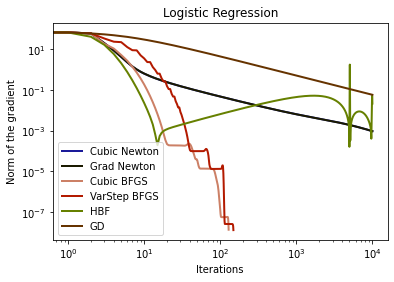

<Figure size 432x288 with 0 Axes>

In [27]:
#nalgs = len(rs);
nalgs = len(rs);

# plotting
fig1 = plt.figure();
for i in range(0,nalgs):
    iterations = np.arange(0,len(rs[i])-1,1)

    plt.plot(iterations, rs[i][0:-1], '-', color=cols[i], linewidth=2);

plt.legend(legs);
plt.yscale('log');
plt.xscale('log');

#plt.xlabel('seq_time')
plt.xlabel('Iterations')
plt.ylabel('Norm of the gradient');
plt.title('Logistic Regression')
plt.savefig('LogisticQN'+name+'.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show();
plt.draw();


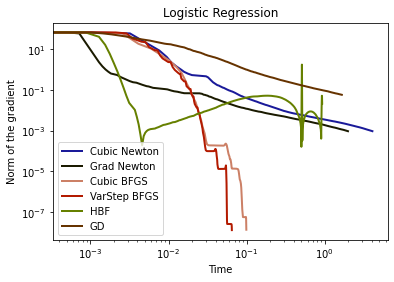

<Figure size 432x288 with 0 Axes>

In [28]:
#nalgs = len(rs);
nalgs = len(rs);
# plotting
fig1 = plt.figure();

for i in range(0,nalgs):
    plt.plot((ts[i][0:-1]), rs[i][0:-1], '-', color=cols[i], linewidth=2);

plt.legend(legs);
plt.yscale('log');
plt.xscale('log');

plt.xlabel('Time')
plt.ylabel('Norm of the gradient');
plt.title('Logistic Regression')
plt.savefig('LogisticQN'+name+'time'+'.pdf', bbox_inches='tight', pad_inches=0.01)

plt.show();
plt.draw();